<a href="https://colab.research.google.com/github/shemalperera/numberplaterecognition/blob/main/Number_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install and Import Dependencies**

In [ ]:
!pip install easyocr

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**Read Image, Grayscale and Blur**

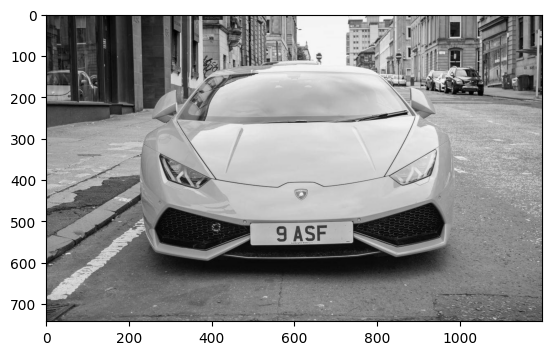

In [ ]:
#img = cv2.imread("/content/why-are-number-plates-yellow-and-white.jpg")
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Number Plate/whose-number-plate-is-this.jpg")
#img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Number Plate/threewheel.jpg")
#img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Number Plate/001-Historic-number-plate-changes-1920x1080.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #without converting to RGB it will make green effect due to BGR


Apply Filter and find edges for localization

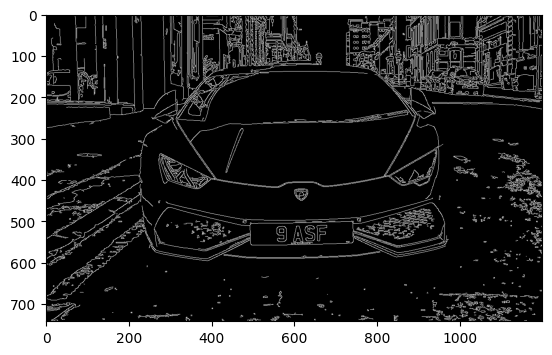

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11,17,17) #noise reduction
edged =cv2.Canny(bfilter, 50, 200) #edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Find Contours and Apply Mask

In [ ]:
keypoints  = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #findingshapes, returns a tree of levels of contours, outputformat
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #return top 10 contours

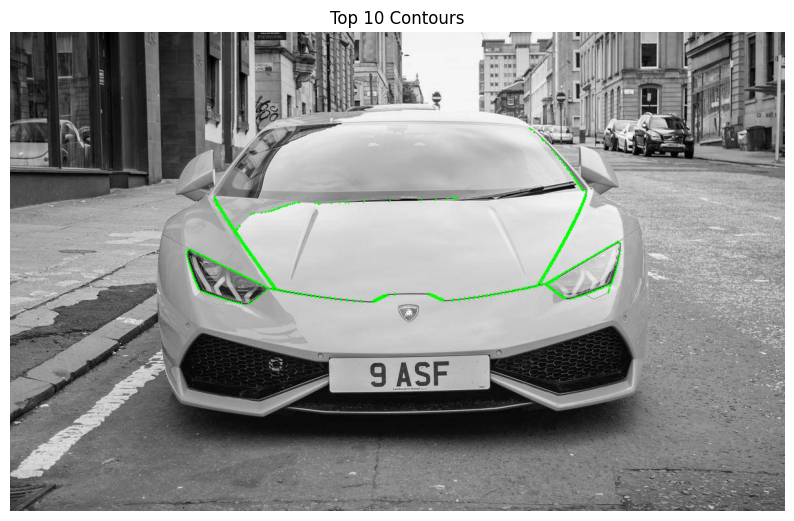

In [ ]:
image_with_contours = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for colored contour drawing
cv2.drawContours(image_with_contours, contours[2], -1, (0, 255, 0), 2)  # Draw contours in green with thickness 2

# Step 3: Display the image with contours using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.title("Top 10 Contours")
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
location = None
for contour in contours:
  peri = cv2.arcLength(contour, True)
  approx = cv2.approxPolyDP(contour, 0.01 * peri, True)   #approximate polygon from contour, accuracy(higher the number=> more roughly the estimation ))
  if len(approx) == 4: #if approximation has 4 key points
    location = approx
    break

In [ ]:
approx

array([[[742, 504]],

       [[739, 553]],

       [[494, 554]],

       [[496, 506]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img,img, mask=mask)


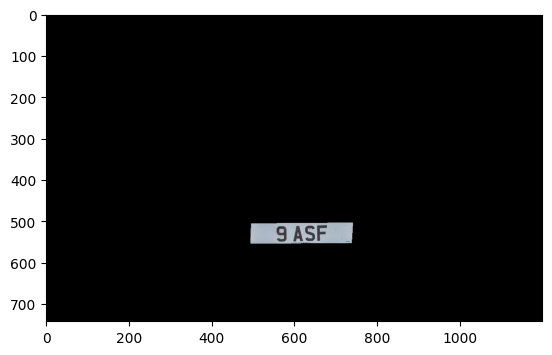

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x),np.min(y))
(x2, y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


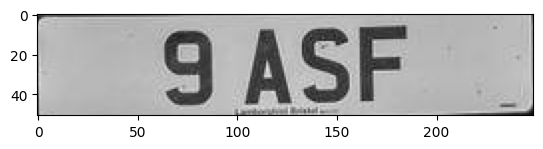

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Use EasyOCR to Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[56, 0], [194, 0], [194, 51], [56, 51]], '9 ASF', 0.9572352787031531)]

In [ ]:
len(result)

1

**Render Result**

In [ ]:
max_confindex = 0
for i in range(len(result)):
  if(result[i][2] >= result[max_confindex][2]):
    max_confindex = i
number_plate = result[max_confindex][1]
print(number_plate)

9 ASF


In [ ]:
approx

array([[[742, 504]],

       [[739, 553]],

       [[494, 554]],

       [[496, 506]]], dtype=int32)

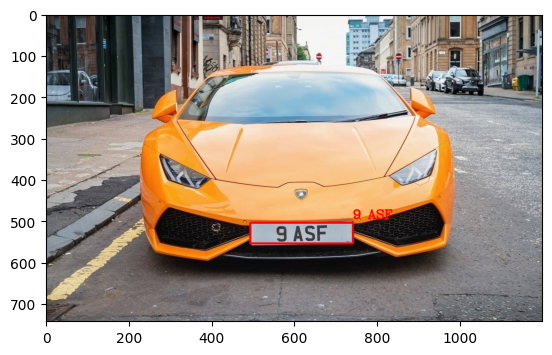

In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX
res = cv2.putText(img, text=number_plate, org=(tuple(approx[0][0])[0],tuple(approx[0][0])[1]-10), fontFace=font, fontScale=1, color=(0,0,255), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]),(0,0,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))